In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
%matplotlib inline

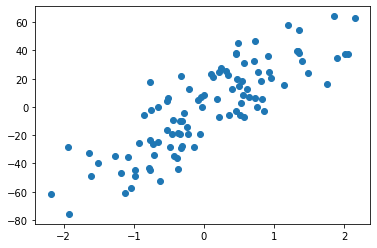

In [2]:
## create dataset
X,Y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,Y)

In [3]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [4]:
## Linear Regression
from sklearn.linear_model import LinearRegression
Linear_reg=LinearRegression()
Linear_reg.fit(X_train,Y_train)
print(Linear_reg.coef_)
print(Linear_reg.intercept_)

[28.16404017]
-2.7130725669241036


<ipython-input-5-2fc0151488d2>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  Lasso_reg.fit(X_train,Y_train)
d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+04, tolerance: 7.701e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


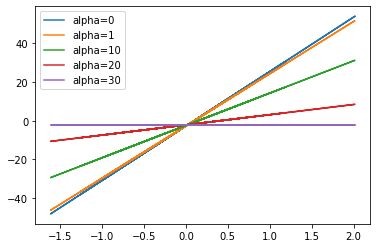

In [5]:
## Lasso
from sklearn.linear_model import Lasso
alphas=[0,1,10,20,30]

coefs=[]
for i in alphas: 
    Lasso_reg=Lasso(alpha=i)
    Lasso_reg.fit(X_train,Y_train)
    coefs.append(Lasso_reg.coef_)
    plt.plot(X_test,Lasso_reg.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

With above graph we can see with increasing alpha slope is decreasing and at alpha=30 we are getting slope i.e. coefficient to 0.
If we see in ridge even at reaching 100 value for alpha there will be some value for m/coefficient but not 0

When we are working with high dimensional data where we have large number of features, so possiblity of overfitting is very high. If we apply ridge regression here then even after increasing alpha value there would be some value for coefficient and it will never be 0 so this means all the features to be kept in case of ridge regression.make_regression.But when we apply lasso regression and increase alpha value little bit then less important features coefficient will immediately become 0. So lasso regression helps in feature selection and simply the process by reducing less important features.

#### Key Points
How variables are affected?

In [6]:
## Load dataset
from sklearn.datasets import load_diabetes

In [7]:
df=load_diabetes()
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [8]:
data=pd.DataFrame(df.data,columns=df.feature_names)
data['Target']=df.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
## Independent and dependent features
X=data.iloc[:,:-1]
Y=data['Target']

In [10]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [11]:
## Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
alphas=[0,0.5,0.75,1]
coef=[]
r2_scores=[]

for i in alphas:
    Lasso_Regresssion=Lasso(alpha=i)
    Lasso_Regresssion.fit(X_train,Y_train)
    coef.append(Lasso_Regresssion.coef_)
    y_pred=Lasso_Regresssion.predict(X_test)
    r2_scores.append(r2_score(Y_test,y_pred))


<ipython-input-11-e44db9861029>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  Lasso_Regresssion.fit(X_train,Y_train)
d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.659e+05, tolerance: 1.989e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Alpha = 1,r2_score = 0.35')

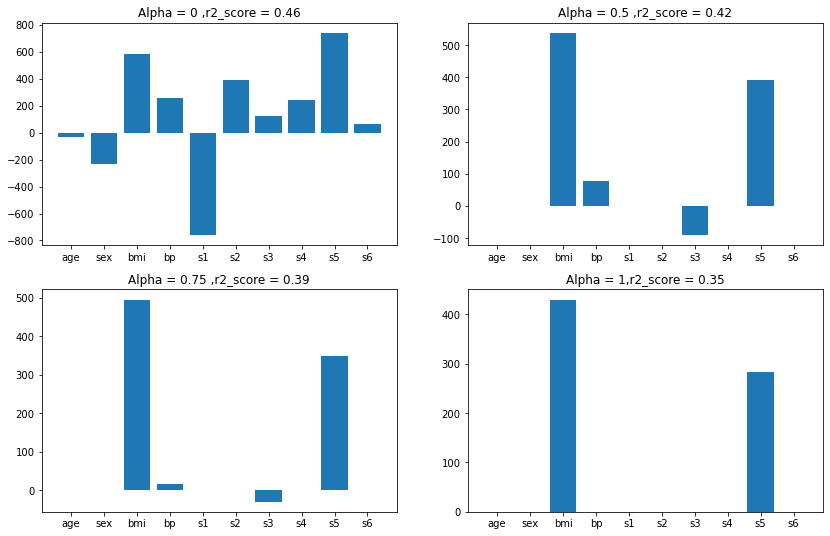

In [12]:
## Plotting graphs
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(df.feature_names,coef[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(df.feature_names,coef[1])
plt.title('Alpha = 0.5 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(df.feature_names,coef[2])
plt.title('Alpha = 0.75 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(df.feature_names,coef[3])
plt.title('Alpha = 1,r2_score = {}'.format(round(r2_scores[3],2)))


With above graphs we can see even small increase in alpha is making the coefficients to 0

Higher Coefficients have higher impact

In [13]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,Y_train)
    
    coefs.append(reg.coef_.tolist())

<ipython-input-13-56cdc8dcb0ae>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train,Y_train)
d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.659e+05, tolerance: 1.989e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [14]:
coef_arr=np.array(coefs)

In [15]:
coef_df=pd.DataFrame(coef_arr,columns=df.feature_names)
coef_df['alpha']=alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-30.930928,-230.759254,585.434095,260.663344,-758.071955,387.648878,120.246000,244.554776,741.732245,67.118445
0.0001,-30.801883,-230.635825,585.516274,260.534037,-750.499996,381.706830,116.692872,243.384313,738.930120,67.149088
0.0010,-29.640659,-229.525189,586.255534,259.370507,-682.376781,328.247907,84.725454,232.852836,713.720219,67.424679
0.0100,-20.521453,-217.788662,593.653457,250.135271,-279.790279,0.000000,-81.465935,194.723290,560.456619,67.542032
0.1000,-0.000000,-149.291885,585.348349,210.846506,-86.205440,-0.000000,-214.187897,0.000000,504.861778,28.398134
1.0000,0.000000,-0.000000,428.823671,0.000000,0.000000,0.000000,-0.000000,0.000000,282.858844,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


The variables with highest coefficent values are decreasing with huge amount

Bias Varince Tradeoff

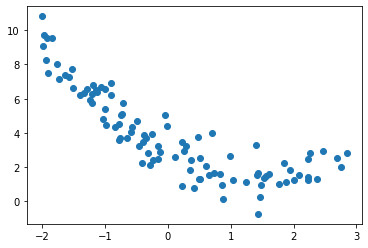

In [16]:
## Generate data
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [17]:
## Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [18]:
## Polynomial with degree 15 and scaling
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [20]:
## mlxtend.evaluate have bias_variance_decomp function which calculates bias and variance for alpha values
from mlxtend.evaluate import bias_variance_decomp

## Generating 100 alpha values between 0 and 20
alphas = np.linspace(0,30,10)

loss = []
bias = []
variance = []

## For each alpha get bias,variance and loss and append them in list
for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

d:\Anaconda\lib\site-packages\mlxtend\evaluate\bias_variance_decomp.py:130: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  pred = estimator.fit(X_boot, y_boot, **fit_params).predict(X_test)
d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.416e+01, tolerance: 4.882e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coo

In [21]:
bias_df=pd.DataFrame(bias)
bias_df['alpha']=alphas
bias_df.set_index('alpha')

,0
alpha,
0.000000,1.054583
3.333333,3.674288
6.666667,8.289774
10.000000,10.768274
13.333333,12.194687
16.666667,14.226307
20.000000,16.376366
23.333333,17.762377
26.666667,18.121919


impact of lambda on loss function

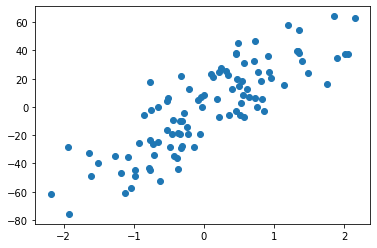

In [24]:
## Create Dataset
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

In [25]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
## Apply simple linear regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,Y_train)
print(reg.coef_)
print(reg.intercept_)

[28.06428544]
-2.4682487786594804


In [27]:
## Calculate loss and prediction    
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.46)**2) + alpha*abs(m)

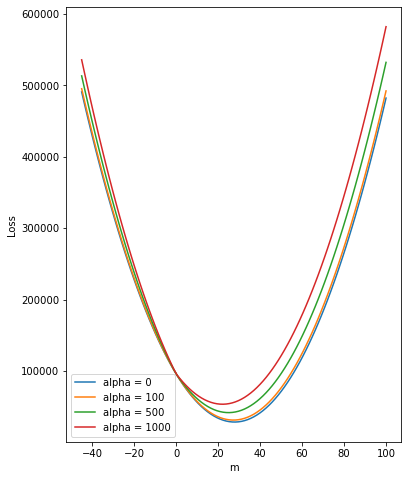

In [30]:
## import mean squared error and calculate loss for Lasso
m = np.linspace(-45,100,100)
plt.figure(figsize=(6,8))
for j in [0,100,500,1000]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()